In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PyQt5
import cv2

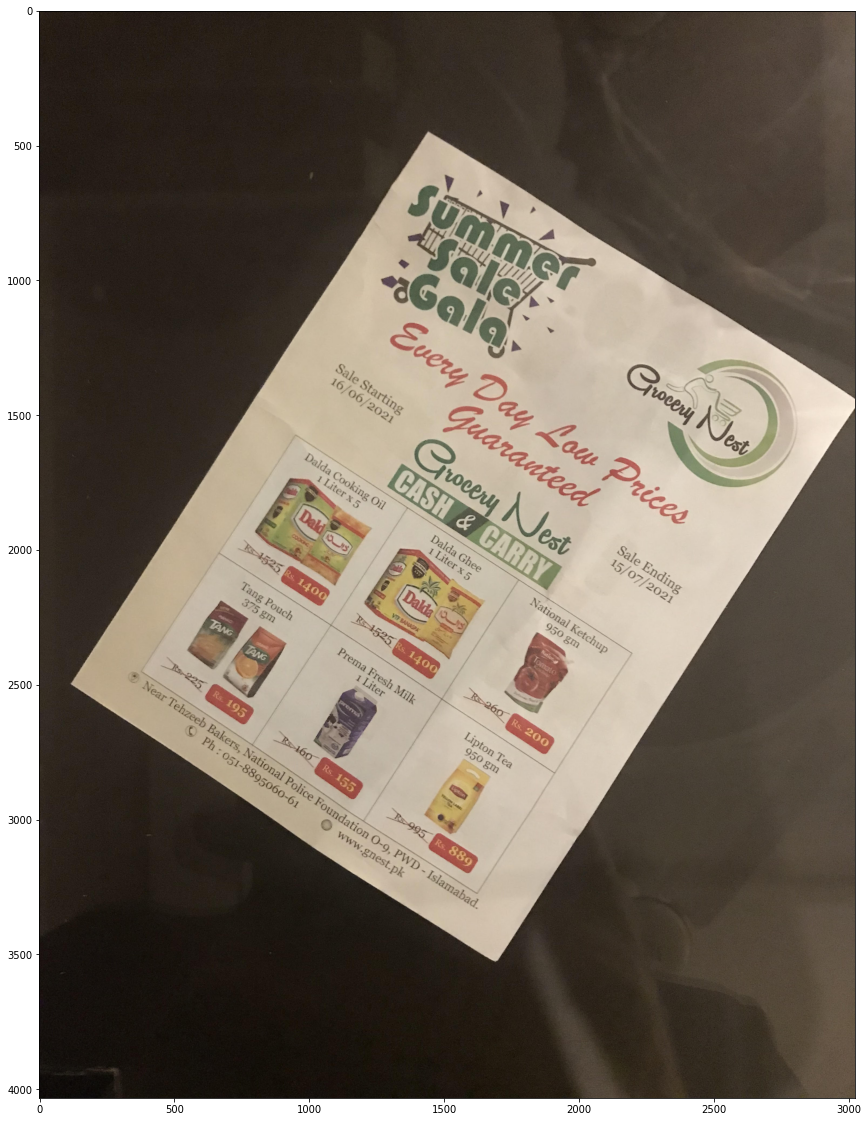

In [14]:
%matplotlib inline
img = cv2.imread(r"C:\Users\Hassaan\Downloads\Image5.jpg")
#img = img[:,:,0:3]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()

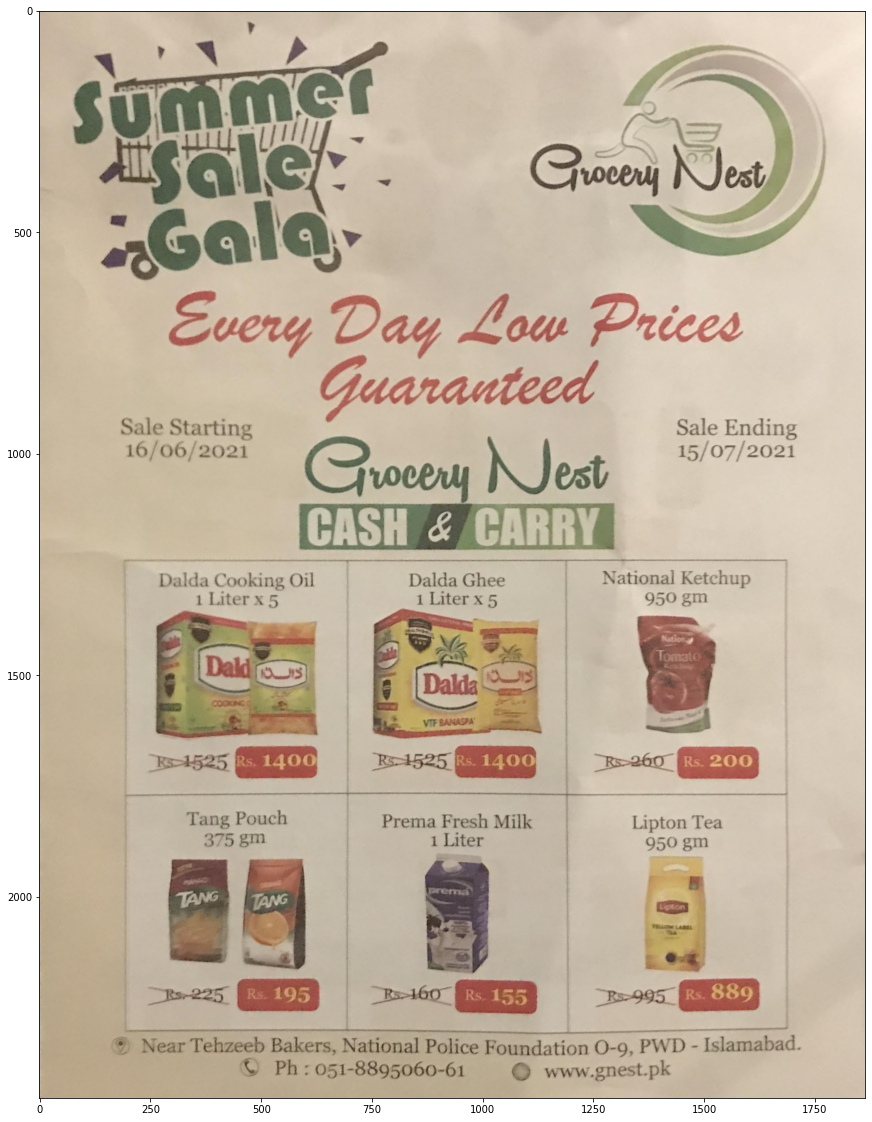

In [16]:
# All points are in format [cols, rows]
pt_A = [1457, 462]
pt_B = [137, 2469]
pt_C = [1686,3506]
pt_D = [3017,1444]

# Here, I have used L2 norm. You can use L1 also.
width_AD = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
width_BC = np.sqrt(((pt_B[0] - pt_C[0]) ** 2) + ((pt_B[1] - pt_C[1]) ** 2))
maxWidth = max(int(width_AD), int(width_BC))


height_AB = np.sqrt(((pt_A[0] - pt_B[0]) ** 2) + ((pt_A[1] - pt_B[1]) ** 2))
height_CD = np.sqrt(((pt_C[0] - pt_D[0]) ** 2) + ((pt_C[1] - pt_D[1]) ** 2))
maxHeight = max(int(height_AB), int(height_CD))



# Specify input and output coordinates that is used
# to calculate the transformation matrix

input_pts = np.float32([pt_A, pt_B, pt_C, pt_D])
output_pts = np.float32([[0, 0],
                        [0, maxHeight - 1],
                        [maxWidth - 1, maxHeight - 1],
                        [maxWidth - 1, 0]])

 
# Compute the perspective transform M
M = cv2.getPerspectiveTransform(input_pts,output_pts)
 
# Apply the perspective transformation to the image
out = cv2.warpPerspective(img,M,(maxWidth, maxHeight),flags=cv2.INTER_LINEAR)
 
# Display the transformed image
plt.figure(figsize=(20,20))
plt.imshow(out)
plt.show()